In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Setting up the working directory
import os

WORK_DIR = '/content/drive/MyDrive/WasAdvGAN/mnist'
os.chdir(WORK_DIR)
print(os.listdir('./'))

DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
print(os.listdir(DATA_DIR))

MODEL_DIR = 'saved_models'
os.makedirs(MODEL_DIR, exist_ok=True)
print(os.listdir(MODEL_DIR))

PLOT_DIR = 'plots'
os.makedirs(PLOT_DIR, exist_ok=True)
print(os.listdir(PLOT_DIR))

WAGAN_DIR = 'wagan'
os.makedirs(WAGAN_DIR, exist_ok=True)
print(os.listdir(WAGAN_DIR))

WAGAN_DATA_DIR = 'data/wagan'
os.makedirs(WAGAN_DATA_DIR, exist_ok=True)
print(os.listdir(WAGAN_DATA_DIR))

['models.py', 'data', '__pycache__', 'saved_models', 'plots', 'advgan', 'wagan', 'advgan.py', 'pipeline.py', 'wasserstein.py', 'wagan.py', 'AdvGAN.ipynb', 'Experiments.ipynb', 'WAGAN-beta+.ipynb']
['MNIST', 'advgan', 'wagan']
['model_original.pth', 'config_original.json', 'model_advgan_original.pth', 'config_advgan_original.json']
['training_error_original.png']
[]
[]


In [3]:
from tqdm.notebook import tqdm
import itertools
import math
import json
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch
import numpy as np
import models
import torch.nn.functional as F
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from pipeline import TargetModel_Pipeline
from wagan import WAGAN_Attack

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## WAGAN adversarial attack

In [5]:
config = dict()
config['name'] = 'beta_plus'
config['model_num_labels'] = 10
config['image_nc'] = 1
config['box_min'] = 0
config['box_max'] = 1
config['trained_model'] = MODEL_DIR + '/model_original.pth'
config['adv_loss_fnc'] = 'c&w'
config['adv_lambda'] = 10
config['pert_lambda'] = 1
config['weights'] = 'init'
config['trained_gen_model'] = None
config['trained_gen_model'] = None
config['initial_lr'] = 0.001
config['cutoff_epochs1'] = 50
config['cutoff_lr1'] = 0.0001
config['cutoff_epochs2'] = 80
config['cutoff_lr2'] = 0.00001
config['batch_size'] = 128
config['num_epochs'] = 60

In [6]:
wagan = WAGAN_Attack(device, config)

In [7]:
mnist_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=False)
dataloader = DataLoader(mnist_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=1)

In [8]:
# training the genereator and discriminator of the AdvGAN model
loss_D_epoch, loss_G_fake_epoch, loss_adv_epoch, loss_perturb_epoch, loss_W_epoch = wagan.fit(dataloader, config['num_epochs'], WAGAN_DIR)

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1:
 loss_D: 0.248,
 loss_G_fake: 0.494,
 loss_adv: 24.132,
 loss_perturb: 14.401, 
 loss_wasserstien: 8661.890, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2:
 loss_D: 0.037,
 loss_G_fake: 0.806,
 loss_adv: 6.557,
 loss_perturb: 16.320, 
 loss_wasserstien: 9202.966, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3:
 loss_D: 0.014,
 loss_G_fake: 0.890,
 loss_adv: 4.215,
 loss_perturb: 16.751, 
 loss_wasserstien: 9150.348, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4:
 loss_D: 0.008,
 loss_G_fake: 0.916,
 loss_adv: 3.856,
 loss_perturb: 16.860, 
 loss_wasserstien: 9178.296, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5:
 loss_D: 0.003,
 loss_G_fake: 0.953,
 loss_adv: 2.867,
 loss_perturb: 16.762, 
 loss_wasserstien: 9314.103, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6:
 loss_D: 0.004,
 loss_G_fake: 0.947,
 loss_adv: 2.392,
 loss_perturb: 16.661, 
 loss_wasserstien: 9301.551, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7:
 loss_D: 0.001,
 loss_G_fake: 0.967,
 loss_adv: 2.242,
 loss_perturb: 16.596, 
 loss_wasserstien: 9324.678, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8:
 loss_D: 0.001,
 loss_G_fake: 0.969,
 loss_adv: 2.261,
 loss_perturb: 16.469, 
 loss_wasserstien: 9206.355, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9:
 loss_D: 0.001,
 loss_G_fake: 0.973,
 loss_adv: 1.847,
 loss_perturb: 16.409, 
 loss_wasserstien: 9280.454, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10:
 loss_D: 0.001,
 loss_G_fake: 0.980,
 loss_adv: 1.872,
 loss_perturb: 16.346, 
 loss_wasserstien: 9212.711, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11:
 loss_D: 0.004,
 loss_G_fake: 0.964,
 loss_adv: 1.848,
 loss_perturb: 16.368, 
 loss_wasserstien: 9198.454, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12:
 loss_D: 0.001,
 loss_G_fake: 0.980,
 loss_adv: 1.667,
 loss_perturb: 16.412, 
 loss_wasserstien: 9242.645, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13:
 loss_D: 0.000,
 loss_G_fake: 0.985,
 loss_adv: 1.499,
 loss_perturb: 16.311, 
 loss_wasserstien: 9236.701, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14:
 loss_D: 0.000,
 loss_G_fake: 0.987,
 loss_adv: 1.451,
 loss_perturb: 16.487, 
 loss_wasserstien: 9190.491, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15:
 loss_D: 0.001,
 loss_G_fake: 0.983,
 loss_adv: 1.306,
 loss_perturb: 16.195, 
 loss_wasserstien: 9261.820, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16:
 loss_D: 0.000,
 loss_G_fake: 0.986,
 loss_adv: 1.214,
 loss_perturb: 15.718, 
 loss_wasserstien: 9261.580, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.270,
 loss_perturb: 15.239, 
 loss_wasserstien: 9237.842, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.235,
 loss_perturb: 15.276, 
 loss_wasserstien: 9296.803, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.038,
 loss_perturb: 15.103, 
 loss_wasserstien: 9257.397, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 20:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 1.047,
 loss_perturb: 14.353, 
 loss_wasserstien: 9103.834, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 21:
 loss_D: 0.001,
 loss_G_fake: 0.991,
 loss_adv: 0.969,
 loss_perturb: 14.045, 
 loss_wasserstien: 9329.258, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 22:
 loss_D: 0.001,
 loss_G_fake: 0.987,
 loss_adv: 1.028,
 loss_perturb: 13.820, 
 loss_wasserstien: 9066.219, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 23:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.848,
 loss_perturb: 13.388, 
 loss_wasserstien: 9076.786, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 24:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.845,
 loss_perturb: 13.395, 
 loss_wasserstien: 9082.864, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 25:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 0.982,
 loss_perturb: 13.915, 
 loss_wasserstien: 9105.248, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 26:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.789,
 loss_perturb: 13.621, 
 loss_wasserstien: 9077.721, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 27:
 loss_D: 0.001,
 loss_G_fake: 0.989,
 loss_adv: 0.915,
 loss_perturb: 12.918, 
 loss_wasserstien: 9112.213, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 28:
 loss_D: 0.001,
 loss_G_fake: 0.990,
 loss_adv: 0.739,
 loss_perturb: 12.816, 
 loss_wasserstien: 9082.089, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 29:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.718,
 loss_perturb: 12.501, 
 loss_wasserstien: 9095.841, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 30:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.647,
 loss_perturb: 12.180, 
 loss_wasserstien: 9011.315, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 31:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.649,
 loss_perturb: 11.585, 
 loss_wasserstien: 9040.779, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 32:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.524,
 loss_perturb: 11.181, 
 loss_wasserstien: 9050.293, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 33:
 loss_D: 0.001,
 loss_G_fake: 0.993,
 loss_adv: 0.749,
 loss_perturb: 11.225, 
 loss_wasserstien: 9048.468, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 34:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 0.671,
 loss_perturb: 11.474, 
 loss_wasserstien: 9006.766, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 35:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.566,
 loss_perturb: 10.958, 
 loss_wasserstien: 8951.654, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 36:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.605,
 loss_perturb: 10.806, 
 loss_wasserstien: 8862.705, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 37:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.588,
 loss_perturb: 10.459, 
 loss_wasserstien: 8880.957, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 38:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.607,
 loss_perturb: 10.828, 
 loss_wasserstien: 8914.359, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 39:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.629,
 loss_perturb: 10.452, 
 loss_wasserstien: 8935.739, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 40:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.490,
 loss_perturb: 10.701, 
 loss_wasserstien: 9017.714, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 41:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.479,
 loss_perturb: 9.891, 
 loss_wasserstien: 8757.506, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 42:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.469,
 loss_perturb: 9.415, 
 loss_wasserstien: 8910.106, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 43:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.503,
 loss_perturb: 10.270, 
 loss_wasserstien: 8939.509, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 44:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.453,
 loss_perturb: 9.269, 
 loss_wasserstien: 8843.741, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 45:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.475,
 loss_perturb: 9.111, 
 loss_wasserstien: 8800.703, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 46:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.490,
 loss_perturb: 10.595, 
 loss_wasserstien: 8918.122, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 47:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.470,
 loss_perturb: 9.384, 
 loss_wasserstien: 8879.721, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 48:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.457,
 loss_perturb: 9.199, 
 loss_wasserstien: 8819.522, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 49:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.449,
 loss_perturb: 9.092, 
 loss_wasserstien: 8827.164, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 50:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.279,
 loss_perturb: 8.803, 
 loss_wasserstien: 8895.301, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 51:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.215,
 loss_perturb: 8.183, 
 loss_wasserstien: 8847.074, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 52:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.203,
 loss_perturb: 7.814, 
 loss_wasserstien: 8779.658, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 53:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.205,
 loss_perturb: 7.319, 
 loss_wasserstien: 8661.950, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 54:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.210,
 loss_perturb: 7.197, 
 loss_wasserstien: 8631.521, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 55:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.206,
 loss_perturb: 7.118, 
 loss_wasserstien: 8574.874, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 56:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.189,
 loss_perturb: 6.955, 
 loss_wasserstien: 8571.644, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 57:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.190,
 loss_perturb: 6.759, 
 loss_wasserstien: 8497.099, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 58:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.183,
 loss_perturb: 6.701, 
 loss_wasserstien: 8463.035, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 59:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.157,
 loss_perturb: 6.750, 
 loss_wasserstien: 8503.245, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 60:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.167,
 loss_perturb: 6.700, 
 loss_wasserstien: 8517.574, 



## New Accuracies

In [9]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial training images
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(train_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_train_dataset))
print(num_correct_orig/len(mnist_train_dataset), num_correct_adv/len(mnist_train_dataset))

  0%|          | 0/469 [00:00<?, ?it/s]

59974 175 60000
0.9995666666666667 0.002916666666666667


In [10]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial testing images
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(test_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_test_dataset))
print(num_correct_orig/len(mnist_test_dataset), num_correct_adv/len(mnist_test_dataset))

  0%|          | 0/79 [00:00<?, ?it/s]

9929 63 10000
0.9929 0.0063


### Store adverserial train and test images

In [11]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_train_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/469 [00:00<?, ?it/s]

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [12]:
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(test_dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_test_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/79 [00:00<?, ?it/s]

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


### Examples of Adverserially created images

In [13]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

images_ex = None
adverserial_images_ex = None

for images, labels in train_dataloader:
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  images_ex = images.detach().clone()
  adverserial_images_ex = adv_images.detach().clone()
  print(images_ex.shape)
  print(adverserial_images_ex.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])


In [14]:
index = 100
image = torch.squeeze(images_ex[index])
adversary = torch.squeeze(adverserial_images_ex[index])
print(image.shape, adversary.shape)
# Lp distance between the two images
Lp_distance = (image - adversary).pow(2).sum().item()
print(math.sqrt(Lp_distance))

torch.Size([28, 28]) torch.Size([28, 28])
4.204100768546673


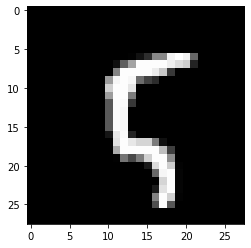

In [15]:
plt.imshow(image.cpu().numpy().squeeze(), cmap='gray')
plt.show()

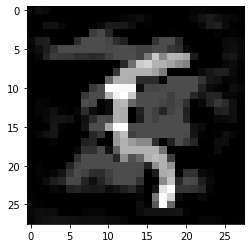

In [16]:
plt.imshow(adversary.cpu().numpy().squeeze(), cmap='gray')
plt.show()